<a href="https://colab.research.google.com/github/Formula-Electric-Berkeley/FEBSim/blob/main/FXScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-811e7a170c6c>:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')
<ipython-input-12-811e7a170c6c>:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_16 = pd.read_csv(data_path_16, delim_whitespace=True, names=column_names, on_bad_lines='skip')


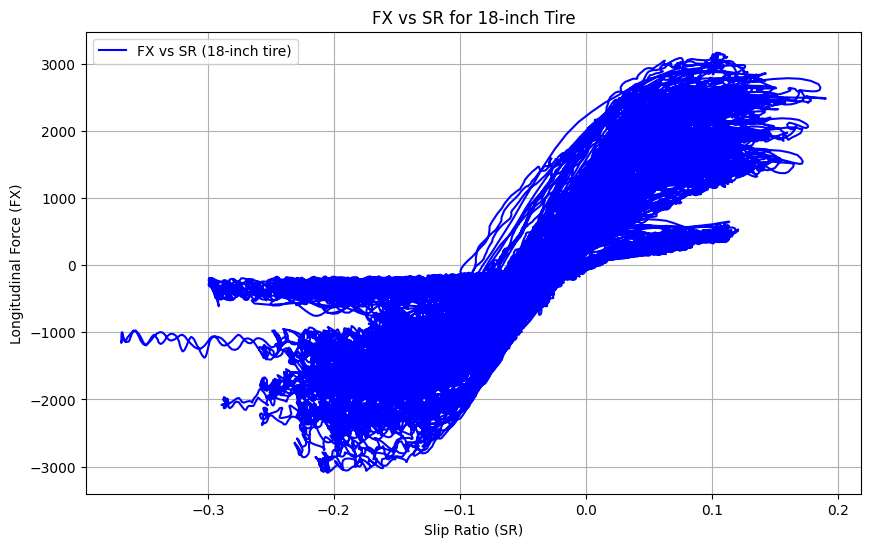

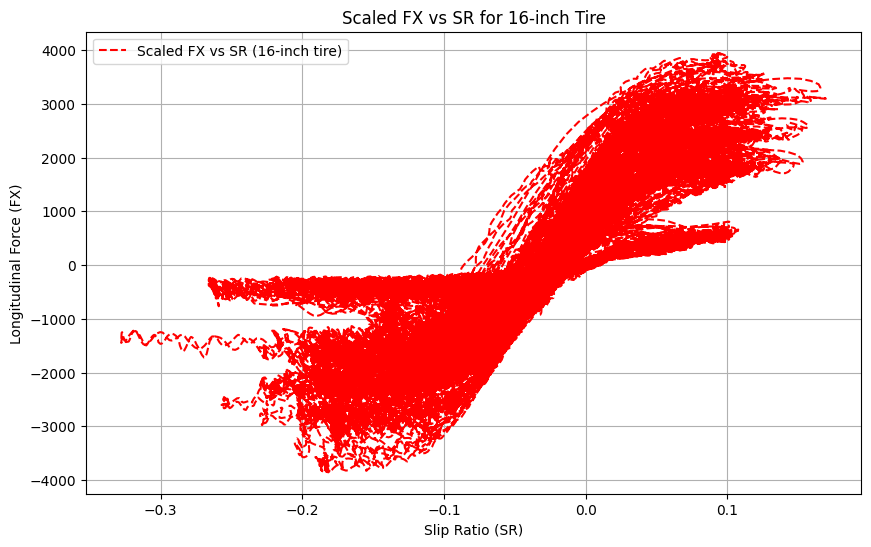

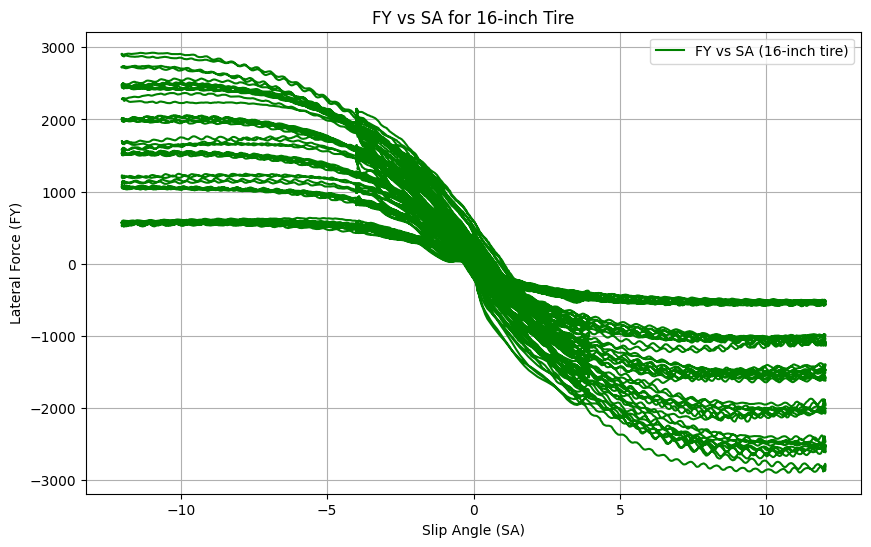

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ',
                'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AMBTMP', 'SR']
data_path_18 = 'B2356raw70.dat' # FEBSim/TireSim/tiredatfiles/B1320run125.dat for other
df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')
df_18 = df_18.iloc[2:].reset_index(drop=True)
df_18 = df_18.apply(pd.to_numeric, errors='coerce')
df_18.dropna(inplace=True)

column_names = ['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ',
                'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AMBTMP', 'SR']
data_path_16 = 'B2356raw5.dat' # FEBSim/TireSim/tiredatfiles/B1320run125.dat for other
df_16 = pd.read_csv(data_path_16, delim_whitespace=True, names=column_names, on_bad_lines='skip')
df_16 = df_16.iloc[2:].reset_index(drop=True)
df_16 = df_16.apply(pd.to_numeric, errors='coerce')
df_16.dropna(inplace=True)









# Assuming df_18 and df_16 are loaded pandas DataFrames
# Scaling parameters
width_18 = 6.0
width_16 = 7.5
rolling_radius_18 = 9.0  # (half of 18 inches)
rolling_radius_16 = 8.0  # (half of 16 inches)

# 1. Scaling FX from 18-inch to 16-inch (Contact patch scaling by width ratio)
width_ratio = width_16 / width_18

# Scale slip ratio based on the rolling radius ratio
radius_ratio = rolling_radius_16 / rolling_radius_18

# Scale FX for the 16-inch tire
df_16_scaled = df_18.copy()
df_16_scaled['FX'] = df_18['FX'] * width_ratio  # Scale the longitudinal force
df_16_scaled['SR'] = df_18['SR'] * radius_ratio  # Scale the slip ratio

# Plot FX vs SR for the original 18-inch tire
plt.figure(figsize=(10, 6))
plt.plot(df_18['SR'], df_18['FX'], label='FX vs SR (18-inch tire)', color='blue')
plt.xlabel('Slip Ratio (SR)')
plt.ylabel('Longitudinal Force (FX)')
plt.title('FX vs SR for 18-inch Tire')
plt.legend()
plt.grid(True)
plt.show()

# Plot FX vs SR for the scaled 16-inch tire
plt.figure(figsize=(10, 6))
plt.plot(df_16_scaled['SR'], df_16_scaled['FX'], label='Scaled FX vs SR (16-inch tire)', color='red', linestyle='--')
plt.xlabel('Slip Ratio (SR)')
plt.ylabel('Longitudinal Force (FX)')
plt.title('Scaled FX vs SR for 16-inch Tire')
plt.legend()
plt.grid(True)
plt.show()


# 3. Plot FY vs SA for the original 16-inch tire (no scaling needed for FY)
plt.figure(figsize=(10, 6))
plt.plot(df_16['SA'], df_16['FY'], label='FY vs SA (16-inch tire)', color='green')
plt.xlabel('Slip Angle (SA)')
plt.ylabel('Lateral Force (FY)')
plt.title('FY vs SA for 16-inch Tire')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-13-b100805d1111>:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')
<ipython-input-13-b100805d1111>:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_16 = pd.read_csv(data_path_16, delim_whitespace=True, names=column_names, on_bad_lines='skip')


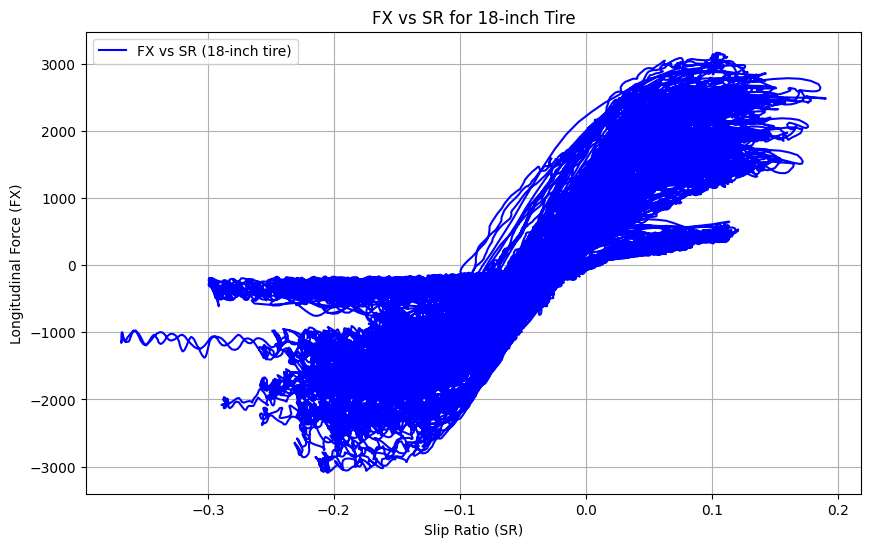

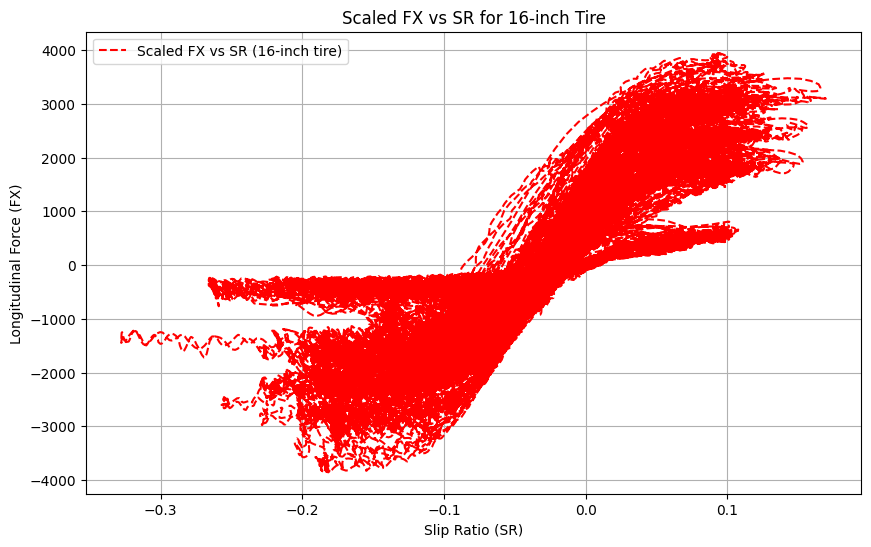

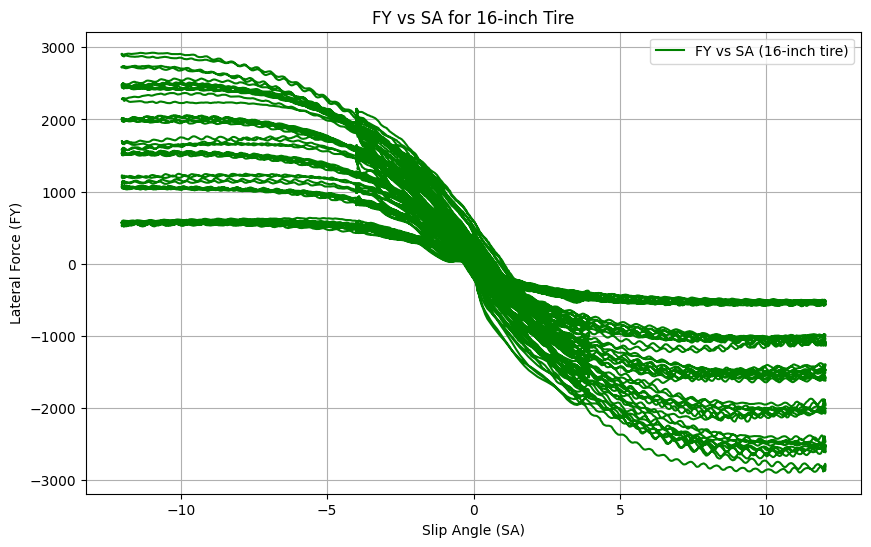

Scaled data has been saved to scaled_16in_tire.dat


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Column names for the data
column_names = ['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ',
                'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AMBTMP', 'SR']

# Load the data for the 18-inch tire
data_path_18 = 'B2356raw70.dat'  # Path to the 18-inch tire data
df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')
df_18 = df_18.iloc[2:].reset_index(drop=True)  # Skip the first two rows (assuming header)
df_18 = df_18.apply(pd.to_numeric, errors='coerce')  # Convert all data to numeric
df_18.dropna(inplace=True)  # Remove rows with NaN values

# Load the data for the 16-inch tire
data_path_16 = 'B2356raw5.dat'  # Path to the 16-inch tire data
df_16 = pd.read_csv(data_path_16, delim_whitespace=True, names=column_names, on_bad_lines='skip')
df_16 = df_16.iloc[2:].reset_index(drop=True)  # Skip the first two rows
df_16 = df_16.apply(pd.to_numeric, errors='coerce')  # Convert all data to numeric
df_16.dropna(inplace=True)  # Remove rows with NaN values

# Scaling parameters
width_18 = 6.0
width_16 = 7.5
rolling_radius_18 = 9.0  # Half of 18 inches
rolling_radius_16 = 8.0  # Half of 16 inches

# 1. Scaling FX from 18-inch to 16-inch (Contact patch scaling by width ratio)
width_ratio = width_16 / width_18

# Scale slip ratio based on the rolling radius ratio
radius_ratio = rolling_radius_16 / rolling_radius_18

# Scale FX for the 16-inch tire
df_16_scaled = df_18.copy()
df_16_scaled['FX'] = df_18['FX'] * width_ratio  # Scale the longitudinal force
df_16_scaled['SR'] = df_18['SR'] * radius_ratio  # Scale the slip ratio

# Save the scaled 16-inch tire data to a .dat file in the same format as input
output_path = 'scaled_16in_tire.dat'
df_16_scaled.to_csv(output_path, sep=' ', index=False, header=False)

# Plot FX vs SR for the original 18-inch tire
plt.figure(figsize=(10, 6))
plt.plot(df_18['SR'], df_18['FX'], label='FX vs SR (18-inch tire)', color='blue')
plt.xlabel('Slip Ratio (SR)')
plt.ylabel('Longitudinal Force (FX)')
plt.title('FX vs SR for 18-inch Tire')
plt.legend()
plt.grid(True)
plt.show()

# Plot FX vs SR for the scaled 16-inch tire
plt.figure(figsize=(10, 6))
plt.plot(df_16_scaled['SR'], df_16_scaled['FX'], label='Scaled FX vs SR (16-inch tire)', color='red', linestyle='--')
plt.xlabel('Slip Ratio (SR)')
plt.ylabel('Longitudinal Force (FX)')
plt.title('Scaled FX vs SR for 16-inch Tire')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot FY vs SA for the original 16-inch tire (no scaling needed for FY)
plt.figure(figsize=(10, 6))
plt.plot(df_16['SA'], df_16['FY'], label='FY vs SA (16-inch tire)', color='green')
plt.xlabel('Slip Angle (SA)')
plt.ylabel('Lateral Force (FY)')
plt.title('FY vs SA for 16-inch Tire')
plt.legend()
plt.grid(True)
plt.show()

print(f"Scaled data has been saved to {output_path}")


In [18]:
import pandas as pd

# Column names for the data
column_names = ['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ',
                'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AMBTMP', 'SR']

# Load the data for the 18-inch tire
data_path_18 = 'B2356raw70.dat'  # Path to the 18-inch tire data
df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')
df_18 = df_18.iloc[2:].reset_index(drop=True)  # Skip the first two rows (assuming header)
df_18 = df_18.apply(pd.to_numeric, errors='coerce')  # Convert all data to numeric
df_18.dropna(inplace=True)  # Remove rows with NaN values

# Scaling parameters
width_18 = 6.0
width_16 = 7.5
rolling_radius_18 = 9.0  # Half of 18 inches
rolling_radius_16 = 8.0  # Half of 16 inches

# Calculate the scaling ratios
width_ratio = width_16 / width_18  # For scaling FX
radius_ratio = rolling_radius_16 / rolling_radius_18  # For scaling SR

# Apply scaling to FX and SR columns
df_18['FX'] = df_18['FX'] * width_ratio  # Scale the longitudinal force (FX)
df_18['SR'] = df_18['SR'] * radius_ratio  # Scale the slip ratio (SR)

# Save the modified DataFrame to a new .dat file, without headers and indices, and with space as the delimiter
output_path = 'scaled_B2356raw70.dat'
df_18.to_csv(output_path, sep=' ', index=False, header=False)

print(f"Scaled data has been saved to {output_path}")


<ipython-input-18-c0a9ec63279f>:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv(data_path_18, delim_whitespace=True, names=column_names, on_bad_lines='skip')


Scaled data has been saved to scaled_B2356raw70.dat


In [19]:
test = pd.read_csv('scaled_B2356raw70.dat', delim_whitespace=True, names=column_names, on_bad_lines='skip')
test

,ET,V,N,SA,IA,RL,RE,P,FX,FY,...,MX,MZ,NFX,NFY,RST,TSTI,TSTC,TSTO,AMBTMP,SR
0,0.000,40.20,471.13,-0.007,-0.009,21.66,22.63,82.66,-681.2500,-27.73,...,124.59,-41.23,0.4557,0.0232,33.61,41.52,45.08,44.72,26.46,-0.038311
1,0.010,40.21,471.00,-0.001,-0.016,21.66,22.65,82.66,-673.9500,-24.59,...,139.75,-29.29,0.4488,0.0205,33.63,41.50,45.12,44.67,26.46,-0.038578
2,0.020,40.24,471.13,-0.001,-0.022,21.66,22.65,82.66,-672.8125,-18.23,...,140.68,-11.19,0.4573,0.0155,33.66,41.47,45.07,44.63,26.45,-0.039111
3,0.030,40.26,471.13,0.007,-0.009,21.66,22.67,82.56,-678.6500,-8.82,...,128.41,8.98,0.4784,0.0078,33.70,41.39,45.01,44.59,26.45,-0.039467
4,0.040,40.25,471.41,-0.001,-0.013,21.66,22.65,82.66,-686.9500,7.53,...,110.71,25.54,0.5033,-0.0069,33.76,41.29,44.95,44.52,26.47,-0.038578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148899,1488.943,72.34,832.37,0.000,-0.002,22.09,23.05,82.31,-679.5000,-21.88,...,74.27,10.34,0.8469,0.0341,37.25,69.17,67.21,65.32,26.94,-0.037067
148900,1488.953,72.31,832.50,-0.004,0.016,22.08,23.04,82.41,-678.0375,-19.36,...,70.56,-0.93,0.8599,0.0307,37.26,69.17,67.22,65.31,26.92,-0.036889
148901,1488.963,72.29,832.30,0.002,0.007,22.09,23.04,82.31,-695.7000,-14.81,...,77.96,-11.35,0.8810,0.0234,37.26,69.15,67.18,65.27,26.92,-0.036622
148902,1488.973,72.35,832.16,-0.006,0.004,22.09,23.06,82.36,-719.5125,-8.22,...,90.56,-13.37,0.8985,0.0128,37.27,69.10,67.12,65.21,26.94,-0.037600
